In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train) , (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
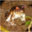

In [ ]:
X_train[0]

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","deer","dog","frog","horse","ship","truck"]

In [ ]:
classes[9]

'ship'

In [ ]:
def plot_sample(X,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(X_train[9])
    plt.xlabel(classes[y[index]])

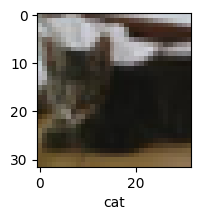

In [ ]:
plot_sample(X_train,y_train,9)

In [ ]:
X_train  = X_train/255
X_test = X_test/255

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 87ms/step - accuracy: 0.3065 - loss: 1.9327
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 83ms/step - accuracy: 0.4215 - loss: 1.6465
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 83ms/step - accuracy: 0.4542 - loss: 1.5458
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 80ms/step - accuracy: 0.4794 - loss: 1.4837
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 152s 87ms/step - accuracy: 0.5026 - loss: 1.4266


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.57      0.57      1000
           1       0.62      0.59      0.60      1000
           2       0.33      0.52      0.41      1000
           3       0.43      0.21      0.28      1000
           4       0.51      0.26      0.35      1000
           5       0.42      0.36      0.39      1000
           6       0.56      0.49      0.52      1000
           7       0.39      0.72      0.51      1000
           8       0.65      0.60      0.62      1000
           9       0.57      0.57      0.57      1000

    accuracy                           0.49     10000
   macro avg       0.51      0.49      0.48     10000
weighted avg       0.51      0.49      0.48     10000



In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 39ms/step - accuracy: 0.3668 - loss: 1.7169
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.5972 - loss: 1.1372
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 38ms/step - accuracy: 0.6547 - loss: 0.9913
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.6842 - loss: 0.9139
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.7111 - loss: 0.8366
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 38ms/step - accuracy: 0.7301 - loss: 0.7783
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 37ms/step - accuracy: 0.7465 - loss: 0.7337
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - accuracy: 0.7605 - loss: 0.6904
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.7687 - loss: 0.6620
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.7828 - loss: 0.6268


In [ ]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7013 - loss: 0.9049


[0.920051097869873, 0.6948000192642212]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


array([[1.2521868e-04, 7.4836653e-06, 3.4868304e-04, 9.5092160e-01,
        5.8413469e-05, 4.1898925e-02, 4.8536947e-03, 1.8495084e-05,
        1.3996670e-03, 3.6783936e-04],
       [5.2174402e-04, 4.7643490e-02, 1.7064602e-07, 8.9211954e-07,
        5.6483395e-07, 8.5572005e-08, 1.4072921e-07, 1.9514573e-07,
        9.5028800e-01, 1.5445768e-03],
       [3.9951812e-02, 4.9241331e-01, 5.0769880e-04, 1.4190478e-03,
        1.7555711e-03, 1.8844832e-04, 3.4210191e-04, 6.3795218e-04,
        3.7507290e-01, 8.7711073e-02],
       [8.3357573e-01, 2.2285134e-03, 7.0654904e-03, 1.3543068e-03,
        2.6173275e-03, 9.8439486e-05, 7.0727343e-04, 1.1791703e-04,
        1.5216789e-01, 6.7056120e-05],
       [7.3598367e-06, 1.6439878e-04, 7.9737548e-03, 3.7253565e-01,
        3.1147372e-02, 2.7510489e-03, 5.8374804e-01, 6.4967548e-06,
        1.5861591e-03, 7.9706297e-05]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [ ]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [ ]:
classes[y_classes[3]]

'airplane'